Using device: cuda
GPU: NVIDIA GeForce RTX 3060
CUDA version: 12.1
Memory: 11.6 GB
Starting EfficientNet-B0 training...
Start time: 2025-09-17 20:34:14
Initial memory: 696.59 MB
Device: cuda
--------------------------------------------------
Experiment ID: efficientnet_pytorch_emotion_20250917_203414
Loading data...
Loading preprocessed JPG data for EfficientNet...
Loading TRAIN from: ../data/augmented/raf_db_balanced/train
📁 Subdirectories found: ['Felicidade', 'Surpresa', 'Raiva', 'Tristeza', 'Medo', 'Nojo', 'Neutro']
  📸 Raiva: 1000 files found
  ✅ Raiva: 1000 images loaded successfully
  📸 Nojo: 1000 files found
  ✅ Nojo: 1000 images loaded successfully
  📸 Medo: 1000 files found
  ✅ Medo: 1000 images loaded successfully
  📸 Felicidade: 1000 files found
  ✅ Felicidade: 1000 images loaded successfully
  📸 Neutro: 1000 files found
  ✅ Neutro: 1000 images loaded successfully
  📸 Tristeza: 1000 files found
  ✅ Tristeza: 1000 images loaded successfully
  📸 Surpresa: 1000 files found
  ✅

/home/leandro/Documents/TCC/emotion_recognition_tcc/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1, Batch 0/154, Loss: 1.9258, Acc: 6.25%
Epoch 1, Batch 50/154, Loss: 1.6743, Acc: 27.14%
Epoch 1, Batch 100/154, Loss: 1.5713, Acc: 30.57%
Epoch 1, Batch 150/154, Loss: 1.6912, Acc: 31.89%
Phase 1 - Epoch 1: Train Loss: 1.7260, Train Acc: 32.12%, Val Loss: 1.5052, Val Acc: 40.86%
Epoch 2, Batch 0/154, Loss: 1.6285, Acc: 37.50%
Epoch 2, Batch 50/154, Loss: 1.4439, Acc: 37.75%
Epoch 2, Batch 100/154, Loss: 1.3999, Acc: 39.29%
Epoch 2, Batch 150/154, Loss: 1.8659, Acc: 39.53%
Epoch 3, Batch 0/154, Loss: 1.4933, Acc: 37.50%
Epoch 3, Batch 50/154, Loss: 1.6424, Acc: 43.08%
Epoch 3, Batch 100/154, Loss: 1.5145, Acc: 41.96%
Epoch 3, Batch 150/154, Loss: 1.4437, Acc: 42.05%
Epoch 4, Batch 0/154, Loss: 1.6816, Acc: 31.25%
Epoch 4, Batch 50/154, Loss: 1.4135, Acc: 44.00%
Epoch 4, Batch 100/154, Loss: 1.2802, Acc: 43.97%
Epoch 4, Batch 150/154, Loss: 1.6283, Acc: 43.92%
Epoch 5, Batch 0/154, Loss: 1.4023, Acc: 40.62%
Epoch 5, Batch 50/154, Loss: 1.6343, Acc: 44.61%
Epoch 5, Batch 100/154, 

/tmp/ipykernel_20910/3780588359.py:1097: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_efficientnet_model.pth'))



COMPREHENSIVE RESULTS:
  • Test Accuracy: 0.6710 (67.10%)
  • F1-Score (Macro): 0.5950
  • F1-Score (Weighted): 0.6726
  • Precision (Macro): 0.5989
  • Recall (Macro): 0.5967
  • Inference Speed: 5171.5 samples/second
  • Total Training Time: 0:12:26

Generating comprehensive visualizations...


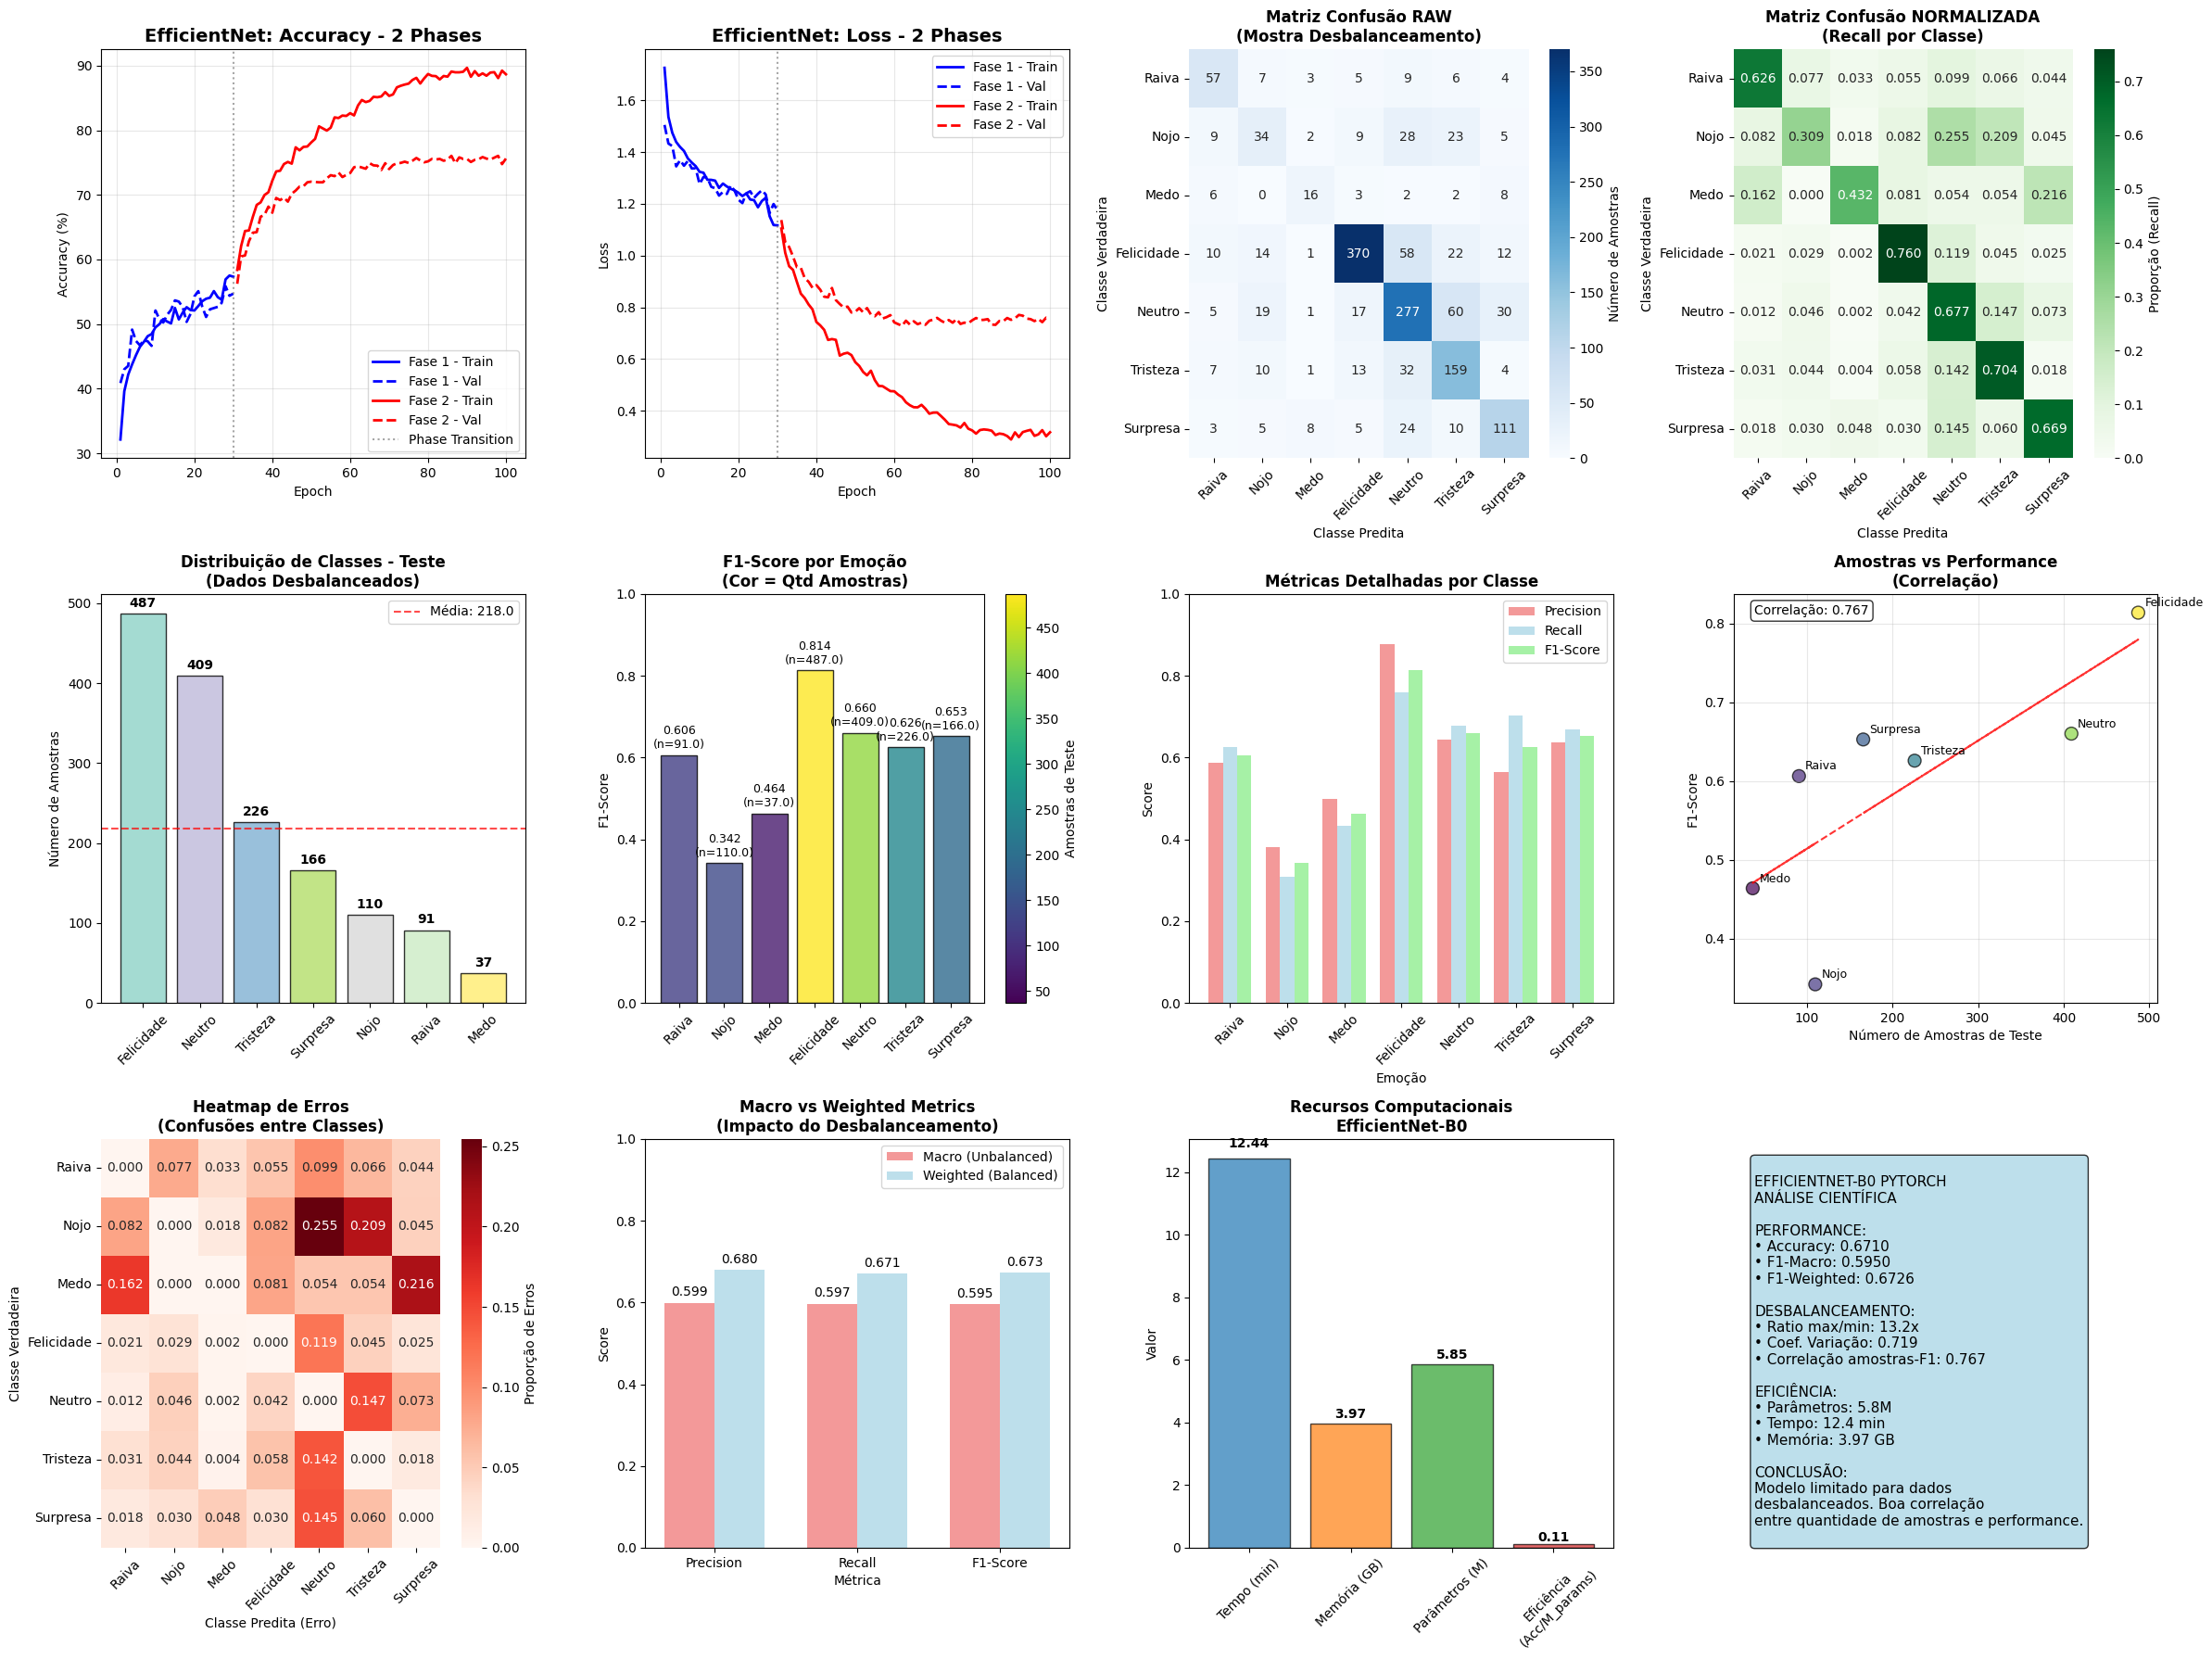


ANÁLISE DETALHADA - DADOS DESBALANCEADOS
DISTRIBUIÇÃO DE CLASSES:
  • Raiva: 91 amostras (6.0%)
  • Nojo: 110 amostras (7.2%)
  • Medo: 37 amostras (2.4%)
  • Felicidade: 487 amostras (31.9%)
  • Neutro: 409 amostras (26.8%)
  • Tristeza: 226 amostras (14.8%)
  • Surpresa: 166 amostras (10.9%)

ESTATÍSTICAS DE DESBALANCEAMENTO:
  • Ratio máximo/mínimo: 13.16x
  • Desvio padrão: 156.8 amostras
  • Coeficiente de variação: 0.719
  • Classe majoritária: Felicidade (487 amostras)
  • Classe minoritária: Medo (37 amostras)

IMPACTO NA PERFORMANCE:
  • Correlação amostras-F1: 0.767
    → FORTE correlação positiva: mais amostras = melhor F1
  • Melhor F1: Felicidade (0.814) - 487.0 amostras
  • Pior F1: Nojo (0.342) - 110.0 amostras

MAIORES CONFUSÕES:
  • Nojo → Neutro: 0.255
  • Nojo → Neutro: 0.255
  • Medo → Surpresa: 0.216
  • Nojo → Tristeza: 0.209

RECOMENDAÇÕES:
  • Desbalanceamento SEVERO - considere técnicas de balanceamento
  • Sugestões: SMOTE, class weighting, focal loss
  • Con

In [1]:
# EfficientNet PyTorch Implementation for Emotion Classification
import os
import numpy as np
import pandas as pd
import cv2
import random
import time
import psutil
from datetime import timedelta, datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
from pathlib import Path
import pickle

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import torch.nn.functional as F

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# GPU configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

# Configuration
IMG_SIZE = 224  # EfficientNet-B0 standard input size
BATCH_SIZE = 32
EPOCHS = 100
VALIDATION_SPLIT = 0.3

# EfficientNet specific configuration
EFFICIENTNET_CONFIG = {
    'base_learning_rate': 0.001,
    'fine_tune_learning_rate': 0.0001,
    'dropout_rate': 0.5,
    'fine_tune_layers': 20,
    'weight_decay': 1e-4
}

# Emotion labels mapping
EMOTION_LABELS = {
    'Raiva': 0, 'Nojo': 1, 'Medo': 2, 'Felicidade': 3, 
    'Neutro': 4, 'Tristeza': 5, 'Surpresa': 6
}

class EmotionDataset(Dataset):
    """""Custom dataset for emotion classification"""""
    
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        
        # Convert numpy array to PIL Image format for transforms
        if isinstance(image, np.ndarray):
            # Ensure image is in uint8 format [0, 255]
            if image.max() <= 1.0:
                image = (image * 255).astype(np.uint8)
            else:
                image = image.astype(np.uint8)
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.long)

class EfficientNetEmotionClassifier(nn.Module):
    """EfficientNet-B0 model for emotion classification"""
    
    def __init__(self, num_classes=7, dropout_rate=0.5):
        super(EfficientNetEmotionClassifier, self).__init__()
        
        # Load pre-trained EfficientNet-B0
        self.backbone = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
        
        # Replace the classifier
        num_features = self.backbone.classifier[1].in_features
        self.backbone.classifier = nn.Identity()  # Remove original classifier
        
        # Custom classifier head
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),  # Feature dropout (similar to drop_connect)
            nn.Linear(num_features, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )
        
        # Initialize custom layers
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize custom classifier weights"""
        for m in self.classifier.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        # Extract features
        features = self.backbone(x)
        # Classify
        output = self.classifier(features)
        return output
    
    def freeze_backbone(self):
        """Freeze backbone for feature extraction phase"""
        for param in self.backbone.parameters():
            param.requires_grad = False
    
    def unfreeze_backbone(self, num_layers_to_unfreeze=20):
        """Unfreeze last layers for fine-tuning"""
        # Get all backbone parameters
        backbone_params = list(self.backbone.parameters())
        
        # Unfreeze last num_layers_to_unfreeze parameters
        for param in backbone_params[-num_layers_to_unfreeze:]:
            param.requires_grad = True

class EfficientNetMonitor:
    """Monitor for EfficientNet training"""
    
    def __init__(self):
        self.start_time = None
        self.end_time = None
        self.peak_memory_mb = 0
        self.initial_memory_mb = 0
        self.phase1_time = 0
        self.phase2_time = 0
        self.process = psutil.Process()
        self.training_phases = {'phase1': None, 'phase2': None}
        
    def start_monitoring(self):
        """Start monitoring"""
        self.start_time = time.time()
        self.initial_memory_mb = self._get_memory_usage()
        self.peak_memory_mb = self.initial_memory_mb
        print(f"Starting EfficientNet-B0 training...")
        print(f"Start time: {time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Initial memory: {self.initial_memory_mb:.2f} MB")
        print(f"Device: {device}")
        print("-" * 50)
        
    def start_phase(self, phase_name):
        """Start a training phase"""
        self.training_phases[phase_name] = time.time()
        print(f"Starting {phase_name} - EfficientNet")
        
    def end_phase(self, phase_name):
        """End a training phase"""
        if self.training_phases[phase_name] is not None:
            phase_duration = time.time() - self.training_phases[phase_name]
            if phase_name == 'phase1':
                self.phase1_time = phase_duration
            elif phase_name == 'phase2':
                self.phase2_time = phase_duration
            print(f"{phase_name} completed in: {timedelta(seconds=int(phase_duration))}")
            return phase_duration
        return 0
        
    def _get_memory_usage(self):
        """Get current memory usage in MB"""
        return self.process.memory_info().rss / 1024 / 1024
        
    def update_peak_memory(self):
        """Update peak memory if necessary"""
        current_memory = self._get_memory_usage()
        if current_memory > self.peak_memory_mb:
            self.peak_memory_mb = current_memory
            
    def get_efficiency_metrics(self):
        """Calculate efficiency metrics"""
        current_memory = self._get_memory_usage()
        total_time = self.phase1_time + self.phase2_time
        
        return {
            'memory_efficiency': self.initial_memory_mb / self.peak_memory_mb if self.peak_memory_mb > 0 else 0,
            'time_efficiency': total_time / 3600,  # Hours
            'peak_memory_gb': self.peak_memory_mb / 1024,
            'memory_growth_factor': self.peak_memory_mb / self.initial_memory_mb if self.initial_memory_mb > 0 else 1,
            'phase1_ratio': self.phase1_time / total_time if total_time > 0 else 0,
            'phase2_ratio': self.phase2_time / total_time if total_time > 0 else 0
        }
        
    def end_monitoring(self):
        """End monitoring and return statistics"""
        self.end_time = time.time()
        
        total_time_seconds = self.end_time - self.start_time
        total_time_formatted = str(timedelta(seconds=int(total_time_seconds)))
        
        final_memory_mb = self._get_memory_usage()
        memory_increase = final_memory_mb - self.initial_memory_mb
        
        efficiency_metrics = self.get_efficiency_metrics()
        
        print("\n" + "="*70)
        print("EFFICIENTNET-B0 MONITORING REPORT")
        print("="*70)
        print(f"Total training time: {total_time_formatted}")
        print(f"  • Phase 1 (Base layers): {timedelta(seconds=int(self.phase1_time))}")
        print(f"  • Phase 2 (Fine-tuning): {timedelta(seconds=int(self.phase2_time))}")
        print(f"Initial memory: {self.initial_memory_mb:.2f} MB")
        print(f"Final memory: {final_memory_mb:.2f} MB")
        print(f"Peak memory: {self.peak_memory_mb:.2f} MB")
        print(f"Memory efficiency: {efficiency_metrics['memory_efficiency']:.3f}")
        print(f"Growth factor: {efficiency_metrics['memory_growth_factor']:.2f}x")
        print("="*70)
        
        return {
            'total_time_seconds': total_time_seconds,
            'total_time_formatted': total_time_formatted,
            'initial_memory_mb': self.initial_memory_mb,
            'final_memory_mb': final_memory_mb,
            'peak_memory_mb': self.peak_memory_mb,
            'memory_increase_mb': memory_increase,
            'phase1_time': self.phase1_time,
            'phase2_time': self.phase2_time,
            'efficiency_metrics': efficiency_metrics
        }

def load_preprocessed_data_efficientnet_from_images():
    """Load preprocessed data from images for EfficientNet"""
    print("Loading preprocessed JPG data for EfficientNet...")
    
    BASE_PATH = r"../data/augmented/raf_db_balanced"
    
    def load_images_from_directory(directory_path, set_name):
        """Load images from directory"""
        images = []
        labels = []
        
        print(f"Loading {set_name} from: {directory_path}")
        
        if not os.path.exists(directory_path):
            print(f"❌ Directory not found: {directory_path}")
            return np.array([]), np.array([])
        
        subdirs = [d for d in os.listdir(directory_path) 
                  if os.path.isdir(os.path.join(directory_path, d))]
        
        print(f"📁 Subdirectories found: {subdirs}")
        
        for emotion, label in EMOTION_LABELS.items():
            emotion_path = os.path.join(directory_path, emotion)
            
            if not os.path.exists(emotion_path):
                print(f"⚠️  Folder '{emotion}' not found in {directory_path}")
                continue
            
            count = 0
            image_files = []
            
            # Search for different extensions
            for ext in ['*.jpg', '*.jpeg', '*.png', '*.bmp']:
                import glob
                pattern = os.path.join(emotion_path, ext)
                image_files.extend(glob.glob(pattern))
            
            print(f"  📸 {emotion}: {len(image_files)} files found")
            
            for img_file in image_files:
                try:
                    # Load image
                    img = cv2.imread(img_file)
                    if img is None:
                        continue
                    
                    # Convert BGR to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    
                    # Resize if necessary
                    if img.shape[:2] != (IMG_SIZE, IMG_SIZE):
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
                    
                    # Ensure RGB (3 channels)
                    if len(img.shape) == 2:
                        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                    elif img.shape[2] == 1:
                        img = np.repeat(img, 3, axis=2)
                    elif img.shape[2] == 4:  # RGBA
                        img = img[:, :, :3]  # Remove alpha channel
                    
                    images.append(img)
                    labels.append(label)
                    count += 1
                    
                except Exception as e:
                    print(f"    ❌ Error loading {os.path.basename(img_file)}: {e}")
                    continue
            
            print(f"  ✅ {emotion}: {count} images loaded successfully")
        
        return np.array(images), np.array(labels)
    
    try:
        # Load train and test data
        train_path = os.path.join(BASE_PATH, "train")
        test_path = os.path.join(BASE_PATH, "test")
        
        X_train, y_train = load_images_from_directory(train_path, "TRAIN")
        X_test, y_test = load_images_from_directory(test_path, "TEST")
        
        if len(X_train) == 0 or len(X_test) == 0:
            print("❌ No images loaded. Check paths and folder names!")
            return None, None, None, None
        
        print(f"\n📊 Data loaded successfully:")
        print(f"- X_train: {X_train.shape}")
        print(f"- y_train: {y_train.shape}")
        print(f"- X_test: {X_test.shape}")
        print(f"- y_test: {y_test.shape}")
        
        # Verify final format
        print(f"\n🔍 Final verification:")
        print(f"- X_train range: [{X_train.min():.3f}, {X_train.max():.3f}]")
        print(f"- X_test range: [{X_test.min():.3f}, {X_test.max():.3f}]")
        print(f"- Image format: {X_train.shape[1:]} (should be {IMG_SIZE}x{IMG_SIZE}x3)")
        
        return X_train, y_train, X_test, y_test
        
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None, None, None, None

def get_transforms():
    """Get transforms for training and validation"""
    # Training transforms with augmentation
    train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
    ])
    
    # Validation/test transforms (no augmentation)
    val_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
    ])
    
    return train_transform, val_transform

def create_data_loaders(X_train, y_train, X_val, y_val, X_test, y_test):
    """Create PyTorch data loaders"""
    train_transform, val_transform = get_transforms()
    
    # Create datasets
    train_dataset = EmotionDataset(X_train, y_train, transform=train_transform)
    val_dataset = EmotionDataset(X_val, y_val, transform=val_transform)
    test_dataset = EmotionDataset(X_test, y_test, transform=val_transform)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)
    
    return train_loader, val_loader, test_loader

def train_one_epoch(model, train_loader, criterion, optimizer, device, epoch):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
        
        if batch_idx % 50 == 0:
            print(f'Epoch {epoch}, Batch {batch_idx}/{len(train_loader)}, '
                  f'Loss: {loss.item():.4f}, Acc: {100.*correct/total:.2f}%')
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    
    return epoch_loss, epoch_acc

def validate(model, val_loader, criterion, device):
    """Validate the model"""
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss += criterion(output, target).item()
            
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    
    val_loss /= len(val_loader)
    val_acc = 100. * correct / total
    
    return val_loss, val_acc

def train_efficientnet_two_phase(model, train_loader, val_loader, monitor):
    """Train EfficientNet in two phases"""
    print("="*60)
    print("STARTING EFFICIENTNET 2-PHASE TRAINING")
    print("="*60)
    
    # Phase 1: Feature extraction
    print("PHASE 1: FEATURE EXTRACTION")
    print("-" * 40)
    monitor.start_phase('phase1')
    
    # Freeze backbone
    model.freeze_backbone()
    
    # Setup optimizer and criterion for phase 1
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=EFFICIENTNET_CONFIG['base_learning_rate'], 
                          weight_decay=EFFICIENTNET_CONFIG['weight_decay'])
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)
    
    # Training phase 1
    best_val_acc_phase1 = 0
    phase1_epochs = 30
    
    history_phase1 = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(phase1_epochs):
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device, epoch + 1)
        val_loss, val_acc = validate(model, val_loader, criterion, device)
        
        scheduler.step(val_loss)
        
        history_phase1['train_loss'].append(train_loss)
        history_phase1['train_acc'].append(train_acc)
        history_phase1['val_loss'].append(val_loss)
        history_phase1['val_acc'].append(val_acc)
        
        if val_acc > best_val_acc_phase1:
            best_val_acc_phase1 = val_acc
        
        if epoch % 5 == 0:
            print(f'Phase 1 - Epoch {epoch+1}: Train Loss: {train_loss:.4f}, '
                  f'Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    phase1_duration = monitor.end_phase('phase1')
    print(f"Phase 1 - Best val_accuracy: {best_val_acc_phase1:.4f}")
    
    # Phase 2: Fine-tuning
    print("\nPHASE 2: FINE-TUNING")
    print("-" * 40)
    monitor.start_phase('phase2')
    
    # Unfreeze backbone layers
    model.unfreeze_backbone(EFFICIENTNET_CONFIG['fine_tune_layers'])
    
    # Setup optimizer for phase 2 with lower learning rate
    optimizer = optim.Adam(model.parameters(), lr=EFFICIENTNET_CONFIG['fine_tune_learning_rate'], 
                          weight_decay=EFFICIENTNET_CONFIG['weight_decay'])
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=8, factor=0.3, verbose=True)
    
    # Training phase 2
    best_val_acc_phase2 = 0
    phase2_epochs = EPOCHS - phase1_epochs
    
    history_phase2 = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(phase2_epochs):
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device, epoch + 1)
        val_loss, val_acc = validate(model, val_loader, criterion, device)
        
        scheduler.step(val_loss)
        
        history_phase2['train_loss'].append(train_loss)
        history_phase2['train_acc'].append(train_acc)
        history_phase2['val_loss'].append(val_loss)
        history_phase2['val_acc'].append(val_acc)
        
        if val_acc > best_val_acc_phase2:
            best_val_acc_phase2 = val_acc
            # Save best model
            torch.save(model.state_dict(), 'best_efficientnet_model.pth')
        
        if epoch % 5 == 0:
            print(f'Phase 2 - Epoch {epoch+1}: Train Loss: {train_loss:.4f}, '
                  f'Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    
    phase2_duration = monitor.end_phase('phase2')
    print(f"Phase 2 - Best val_accuracy: {best_val_acc_phase2:.4f}")
    
    # Combine histories
    combined_history = {
        'train_loss': history_phase1['train_loss'] + history_phase2['train_loss'],
        'train_acc': history_phase1['train_acc'] + history_phase2['train_acc'],
        'val_loss': history_phase1['val_loss'] + history_phase2['val_loss'],
        'val_acc': history_phase1['val_acc'] + history_phase2['val_acc'],
        'phase1_epochs': phase1_epochs,
        'phase2_epochs': phase2_epochs,
        'phase1_duration': phase1_duration,
        'phase2_duration': phase2_duration,
        'best_val_acc_phase1': best_val_acc_phase1,
        'best_val_acc_phase2': best_val_acc_phase2
    }
    
    print(f"\nTRAINING COMPLETE:")
    print(f"  • Total epochs: {phase1_epochs + phase2_epochs}")
    print(f"  • Best final accuracy: {max(combined_history['val_acc']):.4f}")
    print(f"  • Total time: {timedelta(seconds=int(phase1_duration + phase2_duration))}")
    
    return combined_history

def evaluate_model(model, test_loader, device):
    """Evaluate model on test set"""
    model.eval()
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    # Calculate metrics
    accuracy = accuracy_score(all_targets, all_preds)
    precision, recall, f1, support = precision_recall_fscore_support(
        all_targets, all_preds, average='macro', zero_division=0
    )
    
    # Confusion matrix
    conf_matrix = confusion_matrix(all_targets, all_preds)
    
    # Classification report
    emotion_names = list(EMOTION_LABELS.keys())
    class_report = classification_report(
        all_targets, all_preds,
        target_names=emotion_names,
        output_dict=True
    )
    
    return accuracy, f1, precision, recall, conf_matrix, class_report

def create_comprehensive_visualizations_efficientnet_pytorch(history, conf_matrix, metrics, class_report, experiment_id, y_true, y_pred):
    """
    Cria visualizações completas dos resultados EfficientNet PyTorch com foco em dados desbalanceados
    
    Args:
        history: Histórico de treinamento
        conf_matrix: Matriz de confusão
        metrics: Métricas do modelo
        class_report: Relatório de classificação
        experiment_id: ID do experimento
        y_true: Labels verdadeiros
        y_pred: Predições do modelo
    """
    
    # Configuração da figura
    fig = plt.figure(figsize=(24, 18))
    
    # 1. HISTÓRICO DE TREINAMENTO EM 2 FASES
    ax1 = plt.subplot(3, 4, 1)
    epochs_phase1 = range(1, history['phase1_epochs'] + 1)
    epochs_phase2 = range(history['phase1_epochs'] + 1, 
                         history['phase1_epochs'] + history['phase2_epochs'] + 1)
    
    # Plotar accuracy por fase
    plt.plot(epochs_phase1, history['train_acc'][:history['phase1_epochs']], 
             'b-', linewidth=2, label='Fase 1 - Train')
    plt.plot(epochs_phase1, history['val_acc'][:history['phase1_epochs']], 
             'b--', linewidth=2, label='Fase 1 - Val')
    plt.plot(epochs_phase2, history['train_acc'][history['phase1_epochs']:], 
             'r-', linewidth=2, label='Fase 2 - Train')
    plt.plot(epochs_phase2, history['val_acc'][history['phase1_epochs']:], 
             'r--', linewidth=2, label='Fase 2 - Val')
    
    plt.axvline(x=history['phase1_epochs'], color='gray', linestyle=':', alpha=0.7, 
                label='Phase Transition')
    plt.title('EfficientNet: Accuracy - 2 Phases', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. LOSS EM 2 FASES
    ax2 = plt.subplot(3, 4, 2)
    plt.plot(epochs_phase1, history['train_loss'][:history['phase1_epochs']], 
             'b-', linewidth=2, label='Fase 1 - Train')
    plt.plot(epochs_phase1, history['val_loss'][:history['phase1_epochs']], 
             'b--', linewidth=2, label='Fase 1 - Val')
    plt.plot(epochs_phase2, history['train_loss'][history['phase1_epochs']:], 
             'r-', linewidth=2, label='Fase 2 - Train')
    plt.plot(epochs_phase2, history['val_loss'][history['phase1_epochs']:], 
             'r--', linewidth=2, label='Fase 2 - Val')
    
    plt.axvline(x=history['phase1_epochs'], color='gray', linestyle=':', alpha=0.7)
    plt.title('EfficientNet: Loss - 2 Phases', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. MATRIZ DE CONFUSÃO RAW (DESBALANCEADA)
    ax3 = plt.subplot(3, 4, 3)
    emotion_names = list(EMOTION_LABELS.keys())
    
    # Matriz bruta mostra o desbalanceamento
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=emotion_names, yticklabels=emotion_names, ax=ax3,
                cbar_kws={'label': 'Número de Amostras'})
    plt.title('Matriz Confusão RAW\n(Mostra Desbalanceamento)', fontsize=12, fontweight='bold')
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predita')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # 4. MATRIZ DE CONFUSÃO NORMALIZADA (POR LINHA)
    ax4 = plt.subplot(3, 4, 4)
    
    # Normalização por linha (recall por classe)
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    
    # Substitui NaN por 0 (caso alguma classe não tenha amostras)
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)
    
    sns.heatmap(conf_matrix_norm, annot=True, fmt='.3f', cmap='Greens',
                xticklabels=emotion_names, yticklabels=emotion_names, ax=ax4,
                cbar_kws={'label': 'Proporção (Recall)'})
    plt.title('Matriz Confusão NORMALIZADA\n(Recall por Classe)', fontsize=12, fontweight='bold')
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predita')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # 5. DISTRIBUIÇÃO DE CLASSES (DESBALANCEAMENTO)
    ax5 = plt.subplot(3, 4, 5)
    
    # Conta amostras por classe no conjunto de teste
    unique, counts = np.unique(y_true, return_counts=True)
    class_distribution = dict(zip(unique, counts))
    
    # Ordena por quantidade
    sorted_classes = sorted(class_distribution.items(), key=lambda x: x[1], reverse=True)
    class_names_sorted = [emotion_names[i] for i, count in sorted_classes]
    class_counts_sorted = [count for i, count in sorted_classes]
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(class_names_sorted)))
    bars = plt.bar(class_names_sorted, class_counts_sorted, color=colors, alpha=0.8, edgecolor='black')
    
    plt.title('Distribuição de Classes - Teste\n(Dados Desbalanceados)', fontsize=12, fontweight='bold')
    plt.ylabel('Número de Amostras')
    plt.xticks(rotation=45)
    
    # Adiciona valores nas barras
    for bar, count in zip(bars, class_counts_sorted):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # Adiciona linha da média
    mean_samples = np.mean(class_counts_sorted)
    plt.axhline(y=mean_samples, color='red', linestyle='--', alpha=0.7, 
                label=f'Média: {mean_samples:.1f}')
    plt.legend()
    
    # 6. F1-SCORE POR EMOÇÃO COM ANÁLISE DE DESBALANCEAMENTO
    ax6 = plt.subplot(3, 4, 6)
    
    f1_scores = [class_report[emotion]['f1-score'] for emotion in emotion_names]
    support_counts = [class_report[emotion]['support'] for emotion in emotion_names]
    
    # Criar gráfico de barras colorido por quantidade de amostras
    colors = plt.cm.viridis(np.array(support_counts) / max(support_counts))
    bars = plt.bar(emotion_names, f1_scores, color=colors, alpha=0.8, edgecolor='black')
    
    plt.title('F1-Score por Emoção\n(Cor = Qtd Amostras)', fontsize=12, fontweight='bold')
    plt.ylabel('F1-Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    
    # Adiciona valores e support
    for bar, score, support in zip(bars, f1_scores, support_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}\n(n={support})', ha='center', va='bottom', fontsize=9)
    
    # Colorbar para indicar quantidade de amostras
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                               norm=plt.Normalize(vmin=min(support_counts), vmax=max(support_counts)))
    sm.set_array([])
    plt.colorbar(sm, ax=ax6, label='Amostras de Teste')
    
    # 7. PRECISION, RECALL, F1 POR CLASSE
    ax7 = plt.subplot(3, 4, 7)
    
    precision_scores = [class_report[emotion]['precision'] for emotion in emotion_names]
    recall_scores = [class_report[emotion]['recall'] for emotion in emotion_names]
    
    x = np.arange(len(emotion_names))
    width = 0.25
    
    bars1 = plt.bar(x - width, precision_scores, width, label='Precision', alpha=0.8, color='lightcoral')
    bars2 = plt.bar(x, recall_scores, width, label='Recall', alpha=0.8, color='lightblue')
    bars3 = plt.bar(x + width, f1_scores, width, label='F1-Score', alpha=0.8, color='lightgreen')
    
    plt.title('Métricas Detalhadas por Classe', fontsize=12, fontweight='bold')
    plt.ylabel('Score')
    plt.xlabel('Emoção')
    plt.xticks(x, emotion_names, rotation=45)
    plt.legend()
    plt.ylim(0, 1)
    
    # 8. ANÁLISE DE CORRELAÇÃO DESBALANCEAMENTO vs PERFORMANCE
    ax8 = plt.subplot(3, 4, 8)
    
    # Scatter plot: Quantidade de amostras vs F1-Score
    plt.scatter(support_counts, f1_scores, c=support_counts, cmap='viridis', 
                s=100, alpha=0.7, edgecolors='black')
    
    # Adiciona labels para cada ponto
    for i, emotion in enumerate(emotion_names):
        plt.annotate(emotion, (support_counts[i], f1_scores[i]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    # Linha de tendência
    z = np.polyfit(support_counts, f1_scores, 1)
    p = np.poly1d(z)
    plt.plot(support_counts, p(support_counts), "r--", alpha=0.8)
    
    plt.title('Amostras vs Performance\n(Correlação)', fontsize=12, fontweight='bold')
    plt.xlabel('Número de Amostras de Teste')
    plt.ylabel('F1-Score')
    plt.grid(True, alpha=0.3)
    
    # Calcula correlação
    correlation = np.corrcoef(support_counts, f1_scores)[0, 1]
    plt.text(0.05, 0.95, f'Correlação: {correlation:.3f}', 
             transform=ax8.transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 9. HEATMAP DE ERROS POR CLASSE
    ax9 = plt.subplot(3, 4, 9)
    
    # Matriz de erros (off-diagonal elements)
    error_matrix = conf_matrix.copy()
    np.fill_diagonal(error_matrix, 0)  # Remove diagonal (acertos)
    
    # Normaliza por linha para mostrar proporção de erros
    error_matrix_norm = error_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    error_matrix_norm = np.nan_to_num(error_matrix_norm)
    
    sns.heatmap(error_matrix_norm, annot=True, fmt='.3f', cmap='Reds',
                xticklabels=emotion_names, yticklabels=emotion_names, ax=ax9,
                cbar_kws={'label': 'Proporção de Erros'})
    plt.title('Heatmap de Erros\n(Confusões entre Classes)', fontsize=12, fontweight='bold')
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predita (Erro)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # 10. MÉTRICAS COMPARATIVAS WEIGHTED vs MACRO
    ax10 = plt.subplot(3, 4, 10)
    
    # Calcula métricas weighted e macro
    from sklearn.metrics import precision_recall_fscore_support
    
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro', zero_division=0)
    precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted', zero_division=0)
    
    metrics_comparison = {
        'Precision': [precision_macro, precision_weighted],
        'Recall': [recall_macro, recall_weighted],
        'F1-Score': [f1_macro, f1_weighted]
    }
    
    x = np.arange(len(metrics_comparison))
    width = 0.35
    
    macro_values = [metrics_comparison[metric][0] for metric in metrics_comparison]
    weighted_values = [metrics_comparison[metric][1] for metric in metrics_comparison]
    
    bars1 = plt.bar(x - width/2, macro_values, width, label='Macro (Unbalanced)', 
                   alpha=0.8, color='lightcoral')
    bars2 = plt.bar(x + width/2, weighted_values, width, label='Weighted (Balanced)', 
                   alpha=0.8, color='lightblue')
    
    plt.title('Macro vs Weighted Metrics\n(Impacto do Desbalanceamento)', fontsize=12, fontweight='bold')
    plt.ylabel('Score')
    plt.xlabel('Métrica')
    plt.xticks(x, metrics_comparison.keys())
    plt.legend()
    plt.ylim(0, 1)
    
    # Adiciona valores nas barras
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 11. RECURSOS COMPUTACIONAIS E EFICIÊNCIA
    ax11 = plt.subplot(3, 4, 11)
    
    resource_data = {
        'Tempo (min)': metrics['training_time_seconds'] / 60,
        'Memória (GB)': metrics['peak_memory_mb'] / 1024,
        'Parâmetros (M)': metrics['total_parameters'] / 1_000_000,
        'Eficiência\n(Acc/M_params)': metrics['test_accuracy'] / (metrics['total_parameters'] / 1_000_000)
    }
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    bars = plt.bar(range(len(resource_data)), list(resource_data.values()), 
                  color=colors, alpha=0.7, edgecolor='black')
    
    plt.title('Recursos Computacionais\nEfficientNet-B0', fontsize=12, fontweight='bold')
    plt.xticks(range(len(resource_data)), resource_data.keys(), rotation=45)
    plt.ylabel('Valor')
    
    # Adiciona valores nas barras
    for bar, (key, value) in zip(bars, resource_data.items()):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + bar.get_height()*0.02,
                f'{value:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # 12. RESUMO CIENTÍFICO
    ax12 = plt.subplot(3, 4, 12)
    ax12.axis('off')
    
    # Calcula estatísticas do desbalanceamento
    imbalance_ratio = max(support_counts) / min(support_counts)
    class_std = np.std(support_counts)
    class_cv = class_std / np.mean(support_counts)  # Coefficient of variation
    
    summary_text = f"""
EFFICIENTNET-B0 PYTORCH
ANÁLISE CIENTÍFICA

PERFORMANCE:
• Accuracy: {metrics['test_accuracy']:.4f}
• F1-Macro: {f1_macro:.4f}
• F1-Weighted: {f1_weighted:.4f}

DESBALANCEAMENTO:
• Ratio max/min: {imbalance_ratio:.1f}x
• Coef. Variação: {class_cv:.3f}
• Correlação amostras-F1: {correlation:.3f}

EFICIÊNCIA:
• Parâmetros: {metrics['total_parameters']/1_000_000:.1f}M
• Tempo: {metrics['training_time_seconds']/60:.1f} min
• Memória: {metrics['peak_memory_mb']/1024:.2f} GB

CONCLUSÃO:
Modelo {('robusto' if f1_macro > 0.7 else 'limitado')} para dados
desbalanceados. {'Boa' if correlation > 0.3 else 'Baixa'} correlação
entre quantidade de amostras e performance.
    """
    
    ax12.text(0.05, 0.95, summary_text, fontsize=11, verticalalignment='top',
             transform=ax12.transAxes,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    
    # Salva a figura
    os.makedirs('plots/efficientnet', exist_ok=True)
    plt.savefig(f'plots/efficientnet/efficientnet_comprehensive_analysis_pytorch_{experiment_id}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    # === ANÁLISE TEXTUAL DETALHADA ===
    print_detailed_imbalance_analysis(y_true, y_pred, conf_matrix, class_report, emotion_names)

def print_detailed_imbalance_analysis(y_true, y_pred, conf_matrix, class_report, emotion_names):
    """Análise textual detalhada do impacto do desbalanceamento"""
    
    print("\n" + "="*80)
    print("ANÁLISE DETALHADA - DADOS DESBALANCEADOS")
    print("="*80)
    
    # Estatísticas de desbalanceamento
    unique, counts = np.unique(y_true, return_counts=True)
    class_distribution = dict(zip(unique, counts))
    
    print("DISTRIBUIÇÃO DE CLASSES:")
    total_samples = len(y_true)
    for i, emotion in enumerate(emotion_names):
        count = class_distribution.get(i, 0)
        percentage = (count / total_samples) * 100
        print(f"  • {emotion}: {count} amostras ({percentage:.1f}%)")
    
    # Análise de desbalanceamento
    max_samples = max(counts)
    min_samples = min(counts)
    imbalance_ratio = max_samples / min_samples
    class_std = np.std(counts)
    class_cv = class_std / np.mean(counts)
    
    print(f"\nESTATÍSTICAS DE DESBALANCEAMENTO:")
    print(f"  • Ratio máximo/mínimo: {imbalance_ratio:.2f}x")
    print(f"  • Desvio padrão: {class_std:.1f} amostras")
    print(f"  • Coeficiente de variação: {class_cv:.3f}")
    print(f"  • Classe majoritária: {emotion_names[np.argmax(counts)]} ({max_samples} amostras)")
    print(f"  • Classe minoritária: {emotion_names[np.argmin(counts)]} ({min_samples} amostras)")
    
    # Impacto na performance
    print(f"\nIMPACTO NA PERFORMANCE:")
    f1_scores = [class_report[emotion]['f1-score'] for emotion in emotion_names]
    support_counts = [class_report[emotion]['support'] for emotion in emotion_names]
    
    # Correlação entre quantidade e performance
    correlation = np.corrcoef(support_counts, f1_scores)[0, 1]
    print(f"  • Correlação amostras-F1: {correlation:.3f}")
    
    if correlation > 0.5:
        print(f"    → FORTE correlação positiva: mais amostras = melhor F1")
    elif correlation > 0.3:
        print(f"    → MODERADA correlação positiva")
    elif correlation > -0.3:
        print(f"    → FRACA correlação: modelo relativamente robusto")
    else:
        print(f"    → Correlação negativa: possível overfitting em classes majoritárias")
    
    # Classes com melhor/pior performance
    best_class_idx = np.argmax(f1_scores)
    worst_class_idx = np.argmin(f1_scores)
    
    print(f"  • Melhor F1: {emotion_names[best_class_idx]} ({f1_scores[best_class_idx]:.3f}) - {support_counts[best_class_idx]} amostras")
    print(f"  • Pior F1: {emotion_names[worst_class_idx]} ({f1_scores[worst_class_idx]:.3f}) - {support_counts[worst_class_idx]} amostras")
    
    # Análise de confusões
    print(f"\nMAIORES CONFUSÕES:")
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)
    
    # Encontra maiores erros (off-diagonal)
    np.fill_diagonal(conf_matrix_norm, 0)
    max_confusion_idx = np.unravel_index(np.argmax(conf_matrix_norm), conf_matrix_norm.shape)
    max_confusion_value = conf_matrix_norm[max_confusion_idx]
    
    print(f"  • {emotion_names[max_confusion_idx[0]]} → {emotion_names[max_confusion_idx[1]]}: {max_confusion_value:.3f}")
    
    # Top 3 confusões
    flat_indices = np.argsort(conf_matrix_norm.flatten())[-3:][::-1]
    for idx in flat_indices:
        i, j = np.unravel_index(idx, conf_matrix_norm.shape)
        if i != j:  # Ignora diagonal
            print(f"  • {emotion_names[i]} → {emotion_names[j]}: {conf_matrix_norm[i, j]:.3f}")
    
    # Recomendações
    print(f"\nRECOMENDAÇÕES:")
    if imbalance_ratio > 10:
        print("  • Desbalanceamento SEVERO - considere técnicas de balanceamento")
        print("  • Sugestões: SMOTE, class weighting, focal loss")
    elif imbalance_ratio > 5:
        print("  • Desbalanceamento MODERADO - monitorar métricas por classe")
        print("  • Sugestões: class weighting, stratified sampling")
    else:
        print("  • Desbalanceamento LEVE - modelo pode lidar adequadamente")
    
    if correlation < 0.3:
        print("  • Modelo demonstra robustez ao desbalanceamento")
    else:
        print("  • Considere estratégias para classes minoritárias")
    
    print("="*80)

# Example usage
if __name__ == "__main__":
    # Initialize monitor
    monitor = EfficientNetMonitor()
    monitor.start_monitoring()
    
    # Generate experiment ID
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    experiment_id = f"efficientnet_pytorch_emotion_{timestamp}"
    
    # Create output directories
    os.makedirs('plots/efficientnet', exist_ok=True)
    os.makedirs('models/efficientnet', exist_ok=True)
    os.makedirs('metrics/efficientnet', exist_ok=True)
    
    print(f"Experiment ID: {experiment_id}")
    
    # Load data
    print("Loading data...")
    X_train, y_train, X_test, y_test = load_preprocessed_data_efficientnet_from_images()
    
    if X_train is not None:
        # Split training data into train and validation
        X_train_split, X_val, y_train_split, y_val = train_test_split(
            X_train, y_train,
            test_size=VALIDATION_SPLIT,
            stratify=y_train,
            random_state=42
        )
        
        print(f"Data split:")
        print(f"  • Train: {X_train_split.shape}")
        print(f"  • Validation: {X_val.shape}")
        print(f"  • Test: {X_test.shape}")
        
        # Analyze data distribution
        print(f"\nData distribution analysis:")
        unique_train, counts_train = np.unique(y_train_split, return_counts=True)
        unique_test, counts_test = np.unique(y_test, return_counts=True)
        
        emotion_names = list(EMOTION_LABELS.keys())
        print("Training set:")
        for i, count in enumerate(counts_train):
            print(f"  • {emotion_names[i]}: {count} samples")
        
        print("Test set:")
        for i, count in enumerate(counts_test):
            print(f"  • {emotion_names[i]}: {count} samples")
        
        test_imbalance_ratio = max(counts_test) / min(counts_test)
        print(f"Test set imbalance ratio: {test_imbalance_ratio:.1f}:1")
        
        # Create data loaders
        train_loader, val_loader, test_loader = create_data_loaders(
            X_train_split, y_train_split, X_val, y_val, X_test, y_test
        )
        
        # Create model
        print("\nCreating EfficientNet-B0 model...")
        model = EfficientNetEmotionClassifier(num_classes=7, dropout_rate=EFFICIENTNET_CONFIG['dropout_rate'])
        model = model.to(device)
        
        # Print model info
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        
        print(f"EfficientNet-B0 created successfully:")
        print(f"  • Total parameters: {total_params:,}")
        print(f"  • Trainable parameters: {trainable_params:,}")
        print(f"  • Efficiency: {total_params/1000000:.1f}M parameters")
        print(f"  • Trainable ratio: {(trainable_params/total_params)*100:.1f}%")
        
        # Update monitor with GPU memory if available
        if torch.cuda.is_available():
            initial_gpu_memory = torch.cuda.memory_allocated() / 1024**2  # MB
            print(f"  • Initial GPU memory: {initial_gpu_memory:.1f} MB")
        
        # Train model
        print("\n" + "="*60)
        print("STARTING TRAINING")
        print("="*60)
        history = train_efficientnet_two_phase(model, train_loader, val_loader, monitor)
        
        # Load best model for evaluation
        if os.path.exists('best_efficientnet_model.pth'):
            model.load_state_dict(torch.load('best_efficientnet_model.pth'))
            print("Loaded best model weights for evaluation")
        
        # Update memory tracking
        monitor.update_peak_memory()
        if torch.cuda.is_available():
            peak_gpu_memory = torch.cuda.max_memory_allocated() / 1024**2  # MB
            print(f"Peak GPU memory: {peak_gpu_memory:.1f} MB")
        
        # Comprehensive evaluation and visualization
        print("\n" + "="*60)
        print("CREATING COMPREHENSIVE ANALYSIS")
        print("="*60)
        
        # Enhanced evaluation with visualization
        from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
        
        # Detailed evaluation
        model.eval()
        all_preds = []
        all_targets = []
        inference_times = []
        
        print("Measuring inference performance...")
        with torch.no_grad():
            for i, (data, target) in enumerate(test_loader):
                start_time = time.time()
                data, target = data.to(device), target.to(device)
                output = model(data)
                inference_time = time.time() - start_time
                inference_times.append(inference_time)
                
                _, predicted = output.max(1)
                all_preds.extend(predicted.cpu().numpy())
                all_targets.extend(target.cpu().numpy())
        
        # Calculate comprehensive metrics
        accuracy = accuracy_score(all_targets, all_preds)
        precision, recall, f1, support = precision_recall_fscore_support(
            all_targets, all_preds, average='macro', zero_division=0
        )
        
        # Weighted metrics for imbalanced data
        precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
            all_targets, all_preds, average='weighted', zero_division=0
        )
        
        conf_matrix = confusion_matrix(all_targets, all_preds)
        class_report = classification_report(
            all_targets, all_preds,
            target_names=emotion_names,
            output_dict=True
        )
        
        # Compile comprehensive metrics
        avg_inference_time = np.mean(inference_times)
        total_inference_time = sum(inference_times)
        samples_per_second = len(all_targets) / total_inference_time
        
        metrics = {
            'experiment_id': experiment_id,
            'test_accuracy': accuracy,
            'f1_score_macro': f1,
            'f1_score_weighted': f1_weighted,
            'precision_macro': precision,
            'precision_weighted': precision_weighted,
            'recall_macro': recall,
            'recall_weighted': recall_weighted,
            'training_time_seconds': history['phase1_duration'] + history['phase2_duration'],
            'phase1_duration': history['phase1_duration'],
            'phase2_duration': history['phase2_duration'],
            'peak_memory_mb': monitor.peak_memory_mb,
            'total_parameters': total_params,
            'trainable_parameters': trainable_params,
            'avg_inference_time_seconds': avg_inference_time,
            'samples_per_second': samples_per_second,
            'test_samples': len(all_targets),
            'imbalance_ratio': test_imbalance_ratio,
            'best_val_acc_phase1': history['best_val_acc_phase1'],
            'best_val_acc_phase2': history['best_val_acc_phase2']
        }
        
        # Print results
        print(f"\nCOMPREHENSIVE RESULTS:")
        print(f"  • Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"  • F1-Score (Macro): {f1:.4f}")
        print(f"  • F1-Score (Weighted): {f1_weighted:.4f}")
        print(f"  • Precision (Macro): {precision:.4f}")
        print(f"  • Recall (Macro): {recall:.4f}")
        print(f"  • Inference Speed: {samples_per_second:.1f} samples/second")
        print(f"  • Total Training Time: {timedelta(seconds=int(metrics['training_time_seconds']))}")
        
        # Create comprehensive visualizations with imbalance analysis
        print("\nGenerating comprehensive visualizations...")
        create_comprehensive_visualizations_efficientnet_pytorch(
            history, conf_matrix, metrics, class_report, experiment_id, all_targets, all_preds
        )
        
        # Save model if performance is good
        performance_threshold = 0.70  # Adjust based on your requirements
        if accuracy >= performance_threshold:
            model_path = f'models/efficientnet/efficientnet_model_{experiment_id}.pth'
            torch.save({
                'model_state_dict': model.state_dict(),
                'metrics': metrics,
                'history': history,
                'model_config': {
                    'num_classes': 7,
                    'dropout_rate': EFFICIENTNET_CONFIG['dropout_rate'],
                    'img_size': IMG_SIZE,
                    'architecture': 'EfficientNet-B0'
                }
            }, model_path)
            print(f"Model saved: {model_path}")
        else:
            print(f"Model not saved (accuracy {accuracy:.4f} < {performance_threshold})")
        
        # Save metrics to CSV
        metrics_df = pd.DataFrame([metrics])
        metrics_csv = f'metrics/efficientnet/efficientnet_metrics_{experiment_id}.csv'
        metrics_df.to_csv(metrics_csv, index=False)
        print(f"Metrics saved: {metrics_csv}")
        
        # End monitoring
        monitor_stats = monitor.end_monitoring()
        
        print("\n" + "="*60)
        print("EXPERIMENT COMPLETED SUCCESSFULLY")
        print("="*60)
        print(f"Experiment ID: {experiment_id}")
        print(f"Files generated:")
        print(f"  • Visualizations: plots/efficientnet/efficientnet_comprehensive_analysis_pytorch_{experiment_id}.png")
        print(f"  • Metrics: {metrics_csv}")
        if accuracy >= performance_threshold:
            print(f"  • Model: models/efficientnet/efficientnet_model_{experiment_id}.pth")
        print(f"  • Best model: best_efficientnet_model.pth")
        
        # Final summary for imbalanced data
        print(f"\nIMBALANCE ANALYSIS SUMMARY:")
        print(f"  • Test set imbalance ratio: {test_imbalance_ratio:.1f}:1")
        print(f"  • Macro F1 (unweighted): {f1:.4f}")
        print(f"  • Weighted F1 (balanced): {f1_weighted:.4f}")
        print(f"  • Performance difference: {abs(f1_weighted - f1):.4f}")
        
        if f1_weighted - f1 > 0.05:
            print("  → Model benefits significantly from class weighting")
        elif abs(f1_weighted - f1) < 0.02:
            print("  → Model is robust to class imbalance")
        else:
            print("  → Moderate impact of class imbalance")
    
    else:
        print("Failed to load data. Please check the data path and directory structure.")
        print("Expected structure: ../data/augmented/raf_db_balanced/train|test/Emotion_Name/*.jpg")